In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(42)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#sklearn imports
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
# from sklearn. import 
# from sklearn. import 
# from sklearn. import 
# from sklearn. import 
# from sklearn. import 
# from sklearn. import 

In [3]:
#Function declaration
def analyze(X):
    print(X.info(), X.describe())
    
def score_model(model, *train_test_sets):
    model.fit(train_test_sets[0], train_test_sets[2])
    print("train accuracy:", model.score(train_test_sets[0], train_test_sets[2]).round(4))
    print("valid accuracy:", model.score(train_test_sets[1], train_test_sets[3]).round(4))
    print("\n")
    
def tune_hyperparameter(gscv, *train_test_sets):
    score_model(gscv, *train_test_sets)
    print(gscv.best_params_, "\n")
    
def prepare_dataset(X, y):
    return tf.data.Dataset.from_tensor_slices((X, y)).batch(32).prefetch(1)

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["train", "valid"])

In [4]:
#Data preparation
X = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
y = X.pop('label')
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print(X.shape, y.shape, "\n")
analyze(X)
y.value_counts()

(42000, 784) (42000,) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB
None         pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  4

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [5]:
#Data engineering
def engineer(X):
    X_ = X / 255.0
    return X_

X_engineered = engineer(X)
print(X_engineered.shape, "\n")
# analyze(X_engineered)

(42000, 784) 



In [6]:
#Data preprocessing
data_pipeline = make_pipeline(
    PCA(n_components=0.95, random_state=42), 
#     StandardScaler()
)

X_preprocessed = pd.DataFrame(data_pipeline.fit_transform(X_engineered))
print(X_preprocessed.shape, "\n")
# analyze(X_preprocessed)

(42000, 154) 



In [7]:
#Train & Valid sets preparation
X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y, test_size=0.1, stratify=y, random_state=42)

print(X_train.shape, X_valid.shape, "\n")
# analyze(X_train)
# analyze(X_valid)
# print(y_train.value_counts(), y_valid.value_counts())

(37800, 154) (4200, 154) 



In [8]:
#Model selection
mlpc = MLPClassifier(random_state=42, max_iter=500, early_stopping=True, verbose=True, hidden_layer_sizes=(250, 100))

score_model(mlpc, X_train, X_valid, y_train, y_valid)

Iteration 1, loss = 0.50515865
Validation score: 0.946296
Iteration 2, loss = 0.14977489
Validation score: 0.958201
Iteration 3, loss = 0.09475662
Validation score: 0.962963
Iteration 4, loss = 0.06328959
Validation score: 0.964021
Iteration 5, loss = 0.04346448
Validation score: 0.968254
Iteration 6, loss = 0.03143299
Validation score: 0.966402
Iteration 7, loss = 0.01997360
Validation score: 0.969841
Iteration 8, loss = 0.01341389
Validation score: 0.967725
Iteration 9, loss = 0.00903209
Validation score: 0.970635
Iteration 10, loss = 0.00610378
Validation score: 0.970106
Iteration 11, loss = 0.00406135
Validation score: 0.970635
Iteration 12, loss = 0.00290166
Validation score: 0.972487
Iteration 13, loss = 0.00223805
Validation score: 0.970899
Iteration 14, loss = 0.00182854
Validation score: 0.971958
Iteration 15, loss = 0.00155935
Validation score: 0.970899
Iteration 16, loss = 0.00127033
Validation score: 0.971958
Iteration 17, loss = 0.00107789
Validation score: 0.972487
Iterat

In [9]:
#Hyperparameter tuning
# layer1 = [100, 150, 200, 250]
# layer2 = [10, 50, 100, 150]
# param_grid_mlpc = {'hidden_layer_sizes': [(units1, units2) for units1 in layer1 for units2 in layer2 if units2 < units1]}
param_grid_mlpc = {'alpha': [1.0, 0.1, 0.01]}

gs_mlpc = GridSearchCV(mlpc, param_grid_mlpc)

mlpc.verbose = False
tune_hyperparameter(gs_mlpc, X_train, X_valid, y_train, y_valid)

train accuracy: 0.9972
valid accuracy: 0.9798


{'alpha': 0.1} 



In [10]:
#Test set preparation
X_test_engineered = engineer(X_test)
X_test_preprocessed = pd.DataFrame(data_pipeline.transform(X_test_engineered))

print(X_test_preprocessed.shape)
# analyze(X_test_preprocessed)

(28000, 154)


In [11]:
#Final prediction
mlpc.set_params(**gs_mlpc.best_params_)
print(mlpc.score(X_preprocessed, y))

prediction = pd.DataFrame({'ImageId': np.arange(1, X_test.shape[0]+1), 'Label': mlpc.predict(X_test_preprocessed)})
prediction.to_csv('submission.csv', index=False)
pd.read_csv('/kaggle/working/submission.csv')

0.9950952380952381


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [12]:
#Prepare tf dataset
X = np.reshape(X, (-1, 28, 28))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

train_set = prepare_dataset(X_train, y_train)
valid_set = prepare_dataset(X_valid, y_valid)

# for batch in train_set.take(1):
#     print(batch)

In [13]:
#Build model
from functools import partial

convolution = partial(tf.keras.layers.Conv2D, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')
pooling = partial(tf.keras.layers.MaxPool2D)

model = tf.keras.Sequential([
    tf.keras.layers.Input([28, 28, 1]), 
    convolution(64), 
    pooling(), 
    convolution(128), 
    pooling(), 
    convolution(256), 
    pooling(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'), 
#     tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'), 
#     tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.build([None, 28, 28, 1])
model.summary()

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0

Epoch 1/100
1182/1182 [==============================] - 109s 90ms/step - loss: 4.2761 - accuracy: 0.9072 - val_loss: 0.2869 - val_accuracy: 0.9486
Epoch 2/100
1182/1182 [==============================] - 107s 90ms/step - loss: 0.2216 - accuracy: 0.9591 - val_loss: 0.1654 - val_accuracy: 0.9626
Epoch 3/100
1182/1182 [==============================] - 107s 90ms/step - loss: 0.1501 - accuracy: 0.9690 - val_loss: 0.1920 - val_accuracy: 0.9540
Epoch 4/100
1182/1182 [==============================] - 106s 89ms/step - loss: 0.1355 - accuracy: 0.9688 - val_loss: 0.1865 - val_accuracy: 0.9633
Epoch 5/100
1182/1182 [==============================] - 107s 91ms/step - loss: 0.1239 - accuracy: 0.9713 - val_loss: 0.1417 - val_accuracy: 0.9690
Epoch 6/100
1182/1182 [==============================] - 107s 91ms/step - loss: 0.1130 - accuracy: 0.9749 - val_loss: 0.0799 - val_accuracy: 0.9786
Epoch 7/100
1182/1182 [==============================] - 107s 90ms/step - loss: 0.0828 - accuracy: 0.9803 - val_

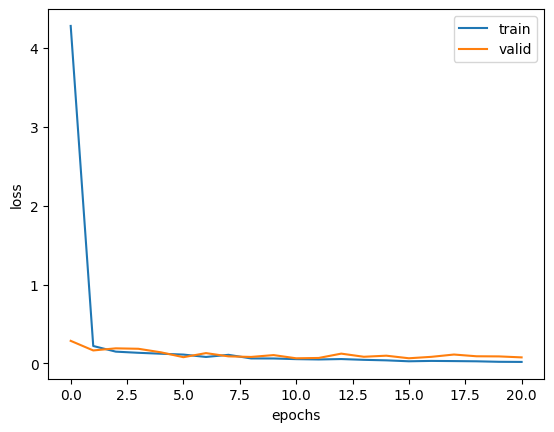

In [14]:
#Fit/Evaluate model
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=1e-4, patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/checkpoints/{epoch:02d}.keras')
history = model.fit(train_set, validation_data=valid_set, epochs=100, callbacks=[early_stopping, model_checkpoint])

plot_loss(history)
#0.066, 0.987

In [15]:
model.evaluate(train_set.concatenate(valid_set))
#0.018, 0.996

1314/1314 [==============================] - 32s 24ms/step - loss: 0.0337 - accuracy: 0.9914


[0.0336686447262764, 0.991428554058075]

In [16]:
#Make predictions
X_test = np.reshape(X_test, (-1, 28, 28))
test_set = tf.data.Dataset.from_tensor_slices(X_test).batch(32).prefetch(1)

predictions = model.predict(test_set)
predictions = np.argmax(predictions, axis=1)
submission2 = pd.DataFrame({'ImageId': np.arange(1, X_test.shape[0]+1), 'Label': predictions})
submission2.to_csv('submission2.csv', index=False)
pd.read_csv('/kaggle/working/submission2.csv')

875/875 [==============================] - 21s 24ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
